In [1]:
#hide
# ! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import torch

## Creating a button to upload an image depicting some human activity

In [13]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [5]:
# Checking for the existence of .pkl files in the current directory (since our trained model is also of the format .pkl)
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('model.pkl')]

In [6]:
learn_inf = load_learner(path/'model.pkl')

In [7]:
# Predicitng the label of an image using the trained model
learn_inf.predict('images/sitting.jpg')

('person sitting',
 tensor(10),
 tensor([6.2269e-08, 8.1419e-09, 1.3913e-06, 9.4430e-09, 2.7182e-06, 5.0359e-06, 9.9700e-09, 4.1634e-07, 1.1528e-07, 3.2591e-08, 9.9998e-01, 1.8061e-06, 1.4153e-06, 6.3347e-06, 1.7168e-08]))

In [8]:
# Output from the prediction
prediction = ('person sitting', tensor(10), tensor([6.2269e-08, 8.1419e-09, 1.3913e-06, 9.4430e-09, 2.7182e-06, 5.0359e-06, 9.9700e-09, 4.1634e-07, 1.1528e-07, 3.2591e-08, 9.9998e-01, 1.8061e-06, 1.4153e-06, 6.3347e-06, 1.7168e-08]))

# Unpack the prediction output
predicted_label, predicted_class_idx, probabilities = prediction

# Convert tensor to a list of probabilities
probs_list = probabilities.tolist()

# Create a list of (label, probability) pairs
label_prob_pairs = list(zip(learn_inf.dls.vocab, probs_list))

# Sort the list in descending order of probabilities
sorted_label_prob_pairs = sorted(label_prob_pairs, key=lambda x: x[1], reverse=True)

# Display the sorted predictions in a nicer format
for label, probability in sorted_label_prob_pairs:
    print(f"{label}: {probability:.5f}")


person sitting: 0.99998
sleeping: 0.00001
hugging: 0.00001
fighting: 0.00000
person using laptop: 0.00000
running: 0.00000
dancing: 0.00000
listening to music: 0.00000
person clapping: 0.00000
calling: 0.00000
person drinking: 0.00000
texting: 0.00000
laughing: 0.00000
eating: 0.00000
cycling: 0.00000


In [9]:
# Taking a look at the different human activity labels that the model has learned to classify
human_act_labels = learn_inf.dls.vocab
print(human_act_labels)
print(type(human_act_labels))

['calling', 'cycling', 'dancing', 'eating', 'fighting', 'hugging', 'laughing', 'listening to music', 'person clapping', 'person drinking', 'person sitting', 'person using laptop', 'running', 'sleeping', 'texting']
<class 'fastai.data.transforms.CategoryMap'>


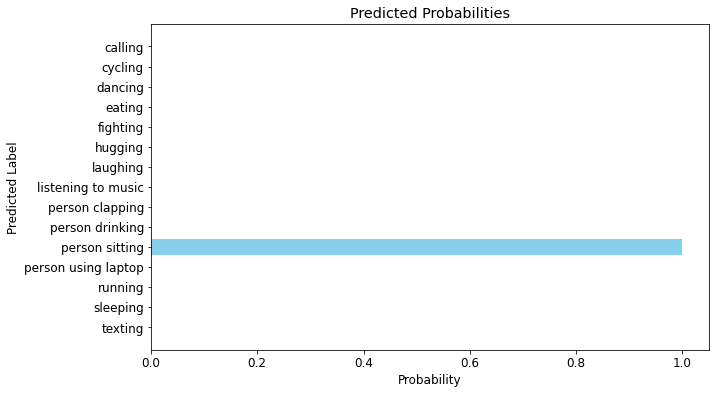

In [10]:
# import matplotlib.pyplot as plt

# Output from the prediction
prediction = ('person sitting', tensor(10), tensor([6.2269e-08, 8.1419e-09, 1.3913e-06, 9.4430e-09, 2.7182e-06, 5.0359e-06, 9.9700e-09, 4.1634e-07, 1.1528e-07, 3.2591e-08, 9.9998e-01, 1.8061e-06, 1.4153e-06, 6.3347e-06, 1.7168e-08]))

# Unpack the prediction output
predicted_label, predicted_class_idx, probabilities = prediction

# Convert tensor to a list of probabilities
probs_list = probabilities.tolist()

# Create a list of labels
labels = learn_inf.dls.vocab

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(labels, probs_list, color='skyblue')
plt.xlabel('Probability')
plt.ylabel('Predicted Label')
plt.title('Predicted Probabilities')
plt.gca().invert_yaxis()  # Invert the y-axis to display labels from top to bottom
plt.show()


In [15]:
# Make sure that atleast one image is uploaded before running this cell
if not btn_upload.data:
    print("Please upload an image first.")
else:
    img = PILImage.create(btn_upload.data[-1])
    # We can continue with the rest of the code to process the image.
    


In [16]:
# Displaying the image we uploaded using the button widget
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [17]:
# Then we get our predictions for the uploaded image:
pred,pred_idx,probs = learn_inf.predict(img)

In [18]:
# We can use a `Label` to display our prediction
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: running; Probability: 0.9955')

In [19]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [30]:
output_probs = widgets.Output()


In [31]:
# def on_click_classify(change):
#     img = PILImage.create(btn_upload.data[-1])
#     out_pl.clear_output()
#     with out_pl: display(img.to_thumb(128,128))
#     pred,pred_idx,probs = learn_inf.predict(img)
#     lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

# def on_click_classify(change):
#     if not btn_upload.data:
#         print("Please upload an image first.")
#         return

#     img = PILImage.create(btn_upload.data[-1])
#     out_pl.clear_output()
#     with out_pl: display(img.to_thumb(128,128))
#     pred, pred_idx, probs = learn_inf.predict(img)
#     lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

def on_click_classify(change):
    if not btn_upload.data:
        print("Please upload an image first.")
        return
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
    # Display the predicted probabilities in descending order
    output_probs.clear_output()
    with output_probs:
        sorted_probs = sorted(zip(learn_inf.dls.vocab, probs.tolist()), key=lambda x: x[1], reverse=True)
        for label, prob in sorted_probs:
            print(f'{label}: {prob:.04f}')


btn_run.on_click(on_click_classify)

In [32]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [34]:
# #hide_output
# VBox([widgets.Label('Select your human activity pic!'),
#       btn_upload, btn_run, out_pl, lbl_pred])
#hide_output
VBox([widgets.Label('Select your human activity pic!'),
      btn_upload, btn_run, out_pl, lbl_pred, output_probs])


In [35]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: C:\Users\fcbsa\anaconda3\etc\jupyter
    - Validating...
      voila 0.4.3 ok
